X matrix dimensionality: (20000, 16)
Y vector dimensionality: (20000,)
Accuracy:  0.9665
[[157   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 152   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 143   0   0   0   0   0   0   0   0   1   0   0   2   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   0   0 154   0   0   0   4   0   0   0   0   0   1   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 149   0   2   0   0   0   0   1   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   1   0   1   0 142   0   0   0   0   0   0   0   1   0   5   0   0
    0   4   0   0   0   0   1   0]
 [  0   1   0   1   1   0 149   1   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   0   2   0   0   0 136   0   1   5   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151  

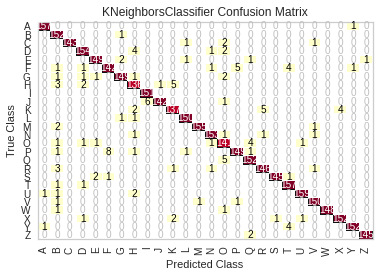

In [ ]:
import pandas as pd
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


url = "letter-recog.csv"

names = ['class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']

dataset = pd.read_csv(url, names=names)

# Return the dimensionality of the DataFrame
# print(dataset.shape)

# Generates descriptive statistics
# print(dataset.describe())

# class distribution
# print(dataset.groupby('class').size())

# histograms
# dataset.hist()
# plt.show()

array = dataset.values
X = array[:, 1:17]
Y = array[:, 0]

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)

# split the data into a training set and a test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                                random_state=10, stratify=Y)
# print("X_train: ", X_train.shape)
# print("X_validation: ", X_validation.shape))
# print("Y_train: ", Y_train.shape))
# print("Y_validation: ", Y_validation.shape))

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)

cm = ConfusionMatrix(knn, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

# predict the responses for test dataset
predictions = cm.predict(X_validation)

# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

cm.poof()